In [1]:
# In[372]:


import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
import random

credit셋은 따로 모델링 필요없이 drop_na모델이랑 같이

In [14]:
pd.options.display.float_format = '{:.2f}'.format
#%%
# 경로지정
os.chdir('C:\\Users\\215-01\\Desktop\\빅콘\\2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908')
os.getcwd()
# In[374]:

'C:\\Users\\215-01\\Desktop\\빅콘\\2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908'

In [15]:
train_unu_age = pd.read_csv('train_unu_age_1013.csv')
train_unu_credit = pd.read_csv('train_unu_credit_1013.csv')
train_unu_drop_na = pd.read_csv('train_unu_drop_na_1013.csv')
train_unu_enter = pd.read_csv('train_unu_enter_1013.csv')
train_unu_loan= pd.read_csv('train_unu_loan_1013.csv')

In [16]:
train_unu_loan.isnull().sum()

application_id                          0
bank_id                                 0
product_id                              0
loan_limit                             31
loan_rate                              31
is_applied                              0
gender                                  0
credit_score                            3
yearly_income                           0
income_type                             0
employment_type                         0
houseown_type                           0
desired_amount                          0
purpose                                 0
personal_rehabilitation_complete_yn     0
existing_loan_cnt                       0
existing_loan_amt                       0
근속개월                                    2
age                                     0
dtype: int64

In [18]:
train_unu_loan.drop(['loan_limit','loan_rate'],axis=1,inplace = True)

In [19]:
for i in train_unu_loan.columns:
    model = ols('credit_score ~ train_unu_loan[i]', train_unu_loan).fit()
    print(f'독립변수 이름: {i}')
    print(anova_lm(model))
    print('============='*3)
    print(model.summary())
    print('\n')

독립변수 이름: application_id
                     df    sum_sq  mean_sq    F  PR(>F)
train_unu_loan[i]  1.00  70359.98 70359.98 2.48    0.13
Residual          26.00 736925.74 28343.30  nan     nan
                            OLS Regression Results                            
Dep. Variable:           credit_score   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.482
Date:                Thu, 13 Oct 2022   Prob (F-statistic):              0.127
Time:                        22:18:27   Log-Likelihood:                -182.22
No. Observations:                  28   AIC:                             368.4
Df Residuals:                      26   BIC:                             371.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  

In [20]:
#
#credit, personal_rehabilitation_complete_yn
train_unu_loan['credit_score'] = train_unu_loan['credit_score'].fillna(train_unu_drop_na.groupby(['bank_id', 
                                                                                                  'personal_rehabilitation_complete_yn',
                                                                                                 'existing_loan_cnt'])['credit_score'].transform('mean'))

In [21]:
train_unu_loan.isnull().sum()

application_id                         0
bank_id                                0
product_id                             0
is_applied                             0
gender                                 0
credit_score                           0
yearly_income                          0
income_type                            0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
근속개월                                   2
age                                    0
dtype: int64

In [47]:
for i in train_unu_loan.columns:
    model = ols('근속개월 ~ train_unu_loan[i]', train_unu_loan).fit()
    print(f'독립변수 이름: {i}')
    print(anova_lm(model))
    print('============='*3)
    print(model.summary())
    print('\n')

독립변수 이름: bank_id
                     df   sum_sq  mean_sq    F  PR(>F)
train_unu_loan[i]  1.00  6486.16  6486.16 4.24    0.05
Residual          27.00 41259.70  1528.14  nan     nan
                            OLS Regression Results                            
Dep. Variable:                   근속개월   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     4.244
Date:                Mon, 10 Oct 2022   Prob (F-statistic):             0.0491
Time:                        22:06:27   Log-Likelihood:                -146.42
No. Observations:                  29   AIC:                             296.8
Df Residuals:                      27   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef

In [22]:
#
#bank
train_unu_loan['근속개월'] = train_unu_loan['근속개월'].fillna(train_unu_drop_na.groupby(['bank_id'])['근속개월'].transform('mean'))

In [23]:
train_unu_loan.isnull().sum()

application_id                         0
bank_id                                0
product_id                             0
is_applied                             0
gender                                 0
credit_score                           0
yearly_income                          0
income_type                            0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
근속개월                                   0
age                                    0
dtype: int64

In [24]:
train_unu_enter.isnull().sum()

application_id                            0
bank_id                                   0
product_id                                0
loan_limit                                0
loan_rate                                 0
is_applied                                0
gender                                    0
credit_score                            199
yearly_income                             0
income_type                               0
employment_type                           0
houseown_type                             0
desired_amount                            0
purpose                                   0
personal_rehabilitation_complete_yn       0
existing_loan_cnt                         0
existing_loan_amt                         0
근속개월                                   1120
age                                       0
dtype: int64

In [25]:
train_unu_enter.drop(['근속개월'],axis=1,inplace = True)

In [26]:
train_unu_enter.isnull().sum()

application_id                           0
bank_id                                  0
product_id                               0
loan_limit                               0
loan_rate                                0
is_applied                               0
gender                                   0
credit_score                           199
yearly_income                            0
income_type                              0
employment_type                          0
houseown_type                            0
desired_amount                           0
purpose                                  0
personal_rehabilitation_complete_yn      0
existing_loan_cnt                        0
existing_loan_amt                        0
age                                      0
dtype: int64

In [27]:
for i in train_unu_enter.columns:
    model = ols('credit_score ~ train_unu_enter[i]', train_unu_enter).fit()
    print(f'독립변수 이름: {i}')
    print(anova_lm(model))
    print('============='*3)
    print(model.summary())
    print('\n')

독립변수 이름: application_id
                       df      sum_sq  mean_sq    F  PR(>F)
train_unu_enter[i]   1.00    19524.58 19524.58 1.45    0.23
Residual           919.00 12392787.47 13485.08  nan     nan
                            OLS Regression Results                            
Dep. Variable:           credit_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.448
Date:                Thu, 13 Oct 2022   Prob (F-statistic):              0.229
Time:                        22:20:52   Log-Likelihood:                -5684.9
No. Observations:                 921   AIC:                         1.137e+04
Df Residuals:                     919   BIC:                         1.138e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
      

In [28]:
# loan_lim,
#bank,produ,loan_rate,is_applied,gender,employment,purpose,personal_rehabilitation_complete_yn,existing_loan_cnt
train_unu_enter['credit_score'] = train_unu_enter['credit_score'].fillna(train_unu_drop_na.groupby(['bank_id','product_id',
                                                                                                    'loan_rate', 'is_applied',
                                                                                                    'purpose','gender',
                                                                                                    'personal_rehabilitation_complete_yn',
                                                                                                    'existing_loan_cnt'])['credit_score'].transform('mean'))

In [29]:
train_unu_enter.isnull().sum()

application_id                         0
bank_id                                0
product_id                             0
loan_limit                             0
loan_rate                              0
is_applied                             0
gender                                 0
credit_score                           0
yearly_income                          0
income_type                            0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
age                                    0
dtype: int64

In [30]:
train_unu_credit.isnull().sum()

application_id                            0
bank_id                                   0
product_id                                0
loan_limit                                0
loan_rate                                 0
is_applied                                0
gender                                    0
credit_score                           2598
yearly_income                             0
income_type                               0
employment_type                           0
houseown_type                             0
desired_amount                            0
purpose                                   0
personal_rehabilitation_complete_yn       0
existing_loan_cnt                         0
existing_loan_amt                         0
근속개월                                      0
age                                       0
dtype: int64

In [31]:
train_unu_credit.drop(['credit_score'],axis=1,inplace = True)

In [32]:
train_unu_age.isnull().sum()

application_id                           0
bank_id                                  0
product_id                               0
loan_limit                               0
loan_rate                                0
is_applied                               0
gender                                 203
credit_score                             0
yearly_income                            0
income_type                              0
employment_type                          0
houseown_type                            0
desired_amount                           0
purpose                                  0
personal_rehabilitation_complete_yn      0
existing_loan_cnt                        0
existing_loan_amt                        0
근속개월                                    11
age                                    203
dtype: int64

In [33]:
train_unu_age.drop(['gender','age'],axis=1,inplace = True)

In [334]:
train_unu_credit.isnull().sum()

application_id                         0
bank_id                                0
product_id                             0
loan_limit                             0
loan_rate                              0
is_applied                             0
gender                                 0
yearly_income                          0
income_type                            0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
근속개월                                   0
age                                    0
dtype: int64

In [18]:
for i in train_unu_age.columns:
    model = ols('근속개월 ~ train_unu_age[i]', train_unu_age).fit()
    print(f'독립변수 이름: {i}')
    print(anova_lm(model))
    print('============='*3)
    print(model.summary())
    print('\n')

독립변수 이름: Unnamed: 0
                     df    sum_sq   mean_sq     F  PR(>F)
train_unu_age[i]   1.00 107680.37 107680.37 26.52    0.00
Residual         190.00 771451.37   4060.27   nan     nan
                            OLS Regression Results                            
Dep. Variable:                   근속개월   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     26.52
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           6.49e-07
Time:                        21:41:50   Log-Likelihood:                -1069.1
No. Observations:                 192   AIC:                             2142.
Df Residuals:                     190   BIC:                             2149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                

C:\Users\215-01\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [34]:
# bank_id,product,income_type(),employment_type,desired_amount,personal_rehabilitation_complete_yn,existing_loan_amt,
# loan_limit,rate,credit_score,houseown_type,purpose,existing_loan_cnt
train_unu_age['근속개월'] = train_unu_age['근속개월'].fillna(train_unu_drop_na.groupby(['loan_limit','loan_rate', 
                                                                                                'credit_score', 
                                                                                                'houseown_type', 'purpose',
                                                                                                'existing_loan_cnt'])['근속개월'].transform('mean'))

In [35]:
train_unu_age.isnull().sum()

application_id                         0
bank_id                                0
product_id                             0
loan_limit                             0
loan_rate                              0
is_applied                             0
credit_score                           0
yearly_income                          0
income_type                            0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
근속개월                                   0
dtype: int64

In [337]:
test_unu_age = pd.read_csv('test_unu_age_1013.csv')
test_unu_credit = pd.read_csv('test_unu_credit_1013.csv')
test_unu_drop_na = pd.read_csv('test_unu_drop_na_1013.csv')
test_unu_enter = pd.read_csv('test_unu_enter_1013.csv')
test_unu_loan= pd.read_csv('test_unu_loan_1013.csv')


In [338]:
train_unu_age['근속개월'] = train_unu_age['근속개월'].fillna(train_unu_drop_na.groupby(['loan_limit','loan_rate', 
                                                                                                'credit_score', 
                                                                                                'houseown_type', 'purpose',
                                                                                                'existing_loan_cnt'])['근속개월'].transform('mean'))

In [339]:
test_unu_age.drop(['birth_year','gender','age'],axis=1,inplace=True)

In [340]:
# bank_id,product,income_type(),employment_type,desired_amount,personal_rehabilitation_complete_yn,existing_loan_amt,
# loan_limit,rate,credit_score,houseown_type,purpose,existing_loan_cnt
test_unu_age['근속개월'] = test_unu_age['근속개월'].fillna(train_unu_drop_na.groupby(['loan_limit','loan_rate', 
                                                                                                'credit_score', 
                                                                                                'houseown_type', 'purpose',
                                                                                                'existing_loan_cnt'])['근속개월'].transform('mean'))

In [341]:
# bank_id,product,income_type(),employment_type,desired_amount,personal_rehabilitation_complete_yn,existing_loan_amt,
# loan_limit,rate,credit_score,houseown_type,purpose,existing_loan_cnt
test_unu_age['credit_score'] = test_unu_age['credit_score'].fillna(train_unu_drop_na.groupby(['existing_loan_cnt'])['근속개월'].transform('mean'))

In [342]:
test_unu_age.isnull().sum()

application_id                           0
bank_id                                  0
product_id                               0
loan_limit                               0
loan_rate                                0
is_applied                             190
credit_score                             0
yearly_income                            0
income_type                              0
employment_type                          0
houseown_type                            0
desired_amount                           0
purpose                                  0
personal_rehabilitation_complete_yn      0
existing_loan_cnt                        0
existing_loan_amt                        0
근속개월                                     0
dtype: int64

In [343]:
test_unu_credit.isnull().sum()

application_id                            0
bank_id                                   0
product_id                                0
loan_limit                                0
loan_rate                                 0
is_applied                             1696
birth_year                                0
gender                                    0
credit_score                           1696
yearly_income                             0
income_type                               0
employment_type                           0
houseown_type                             0
desired_amount                            0
purpose                                   0
personal_rehabilitation_complete_yn       0
existing_loan_cnt                         0
existing_loan_amt                         0
근속개월                                      0
age                                       0
dtype: int64

In [344]:
test_unu_enter.isnull().sum()

application_id                           0
bank_id                                  0
product_id                               0
loan_limit                               0
loan_rate                                0
is_applied                             854
birth_year                               0
gender                                   0
credit_score                           108
yearly_income                            0
income_type                              0
employment_type                          0
houseown_type                            0
desired_amount                           0
purpose                                  0
personal_rehabilitation_complete_yn      0
existing_loan_cnt                        0
existing_loan_amt                        0
근속개월                                   854
age                                      0
dtype: int64

In [345]:
test_unu_enter.drop(['근속개월'],axis=1,inplace = True)

In [346]:
# loan_lim,
#bank,produ,loan_rate,is_applied,gender,employment,purpose,personal_rehabilitation_complete_yn,existing_loan_cnt
test_unu_enter['credit_score'] = test_unu_enter['credit_score'].fillna(train_unu_drop_na.groupby(['bank_id','product_id',
                                                                                                    'loan_rate', 'is_applied',
                                                                                                    'purpose','gender','employment_type',
                                                                                                    'personal_rehabilitation_complete_yn',
                                                                                                    'existing_loan_cnt'])['credit_score'].transform('mean'))

In [347]:
test_unu_enter.isnull().sum()

application_id                           0
bank_id                                  0
product_id                               0
loan_limit                               0
loan_rate                                0
is_applied                             854
birth_year                               0
gender                                   0
credit_score                             0
yearly_income                            0
income_type                              0
employment_type                          0
houseown_type                            0
desired_amount                           0
purpose                                  0
personal_rehabilitation_complete_yn      0
existing_loan_cnt                        0
existing_loan_amt                        0
age                                      0
dtype: int64

In [348]:
test_unu_loan['credit_score'] = test_unu_loan['credit_score'].fillna(train_unu_drop_na.groupby(['bank_id', 
                                                                                                  'personal_rehabilitation_complete_yn',
                                                                                                 'existing_loan_cnt'])['credit_score'].transform('mean'))

In [349]:
test_unu_loan['근속개월'] = test_unu_loan['근속개월'].fillna(train_unu_drop_na.groupby(['bank_id'])['근속개월'].transform('mean'))

In [350]:
test_unu_loan.drop(['loan_rate','loan_limit'],axis=1,inplace=True)

KeyError: "['loan_rate' 'loan_limit'] not found in axis"

In [351]:
test_unu_loan.isnull().sum()

Unnamed: 0                              0
index                                   0
application_id                          0
is_applied                             18
birth_year                              0
gender                                  0
income_type                             0
employment_type                         0
houseown_type                           0
purpose                                 0
personal_rehabilitation_complete_yn     0
index.1                                 0
bank_id                                 0
product_id                              0
credit_score                            0
yearly_income                           0
desired_amount                          0
existing_loan_cnt                       0
existing_loan_amt                       0
근속개월                                    0
age                                     0
dtype: int64

In [54]:
for i in train_unu_loan.columns:
    model = ols('gender ~ train_unu_loan[i]', train_unu_loan).fit()
    print(f'독립변수 이름: {i}')
    print(anova_lm(model))
    print('============='*3)
    print(model.summary())
    print('\n')

독립변수 이름: bank_id
                     df  sum_sq  mean_sq    F  PR(>F)
train_unu_loan[i]  1.00    0.02     0.02 0.06    0.81
Residual          29.00    7.66     0.26  nan     nan
                            OLS Regression Results                            
Dep. Variable:                 gender   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.05896
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.810
Time:                        22:17:21   Log-Likelihood:                -22.322
No. Observations:                  31   AIC:                             48.64
Df Residuals:                      29   BIC:                             51.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef   

In [352]:
train_unu_loan.gender.value_counts()

1.00    17
0.00    14
Name: gender, dtype: int64

In [59]:
# 최빈값으로 채움
test_unu_loan['gender'] = test_unu_loan['gender'].fillna(1)

In [55]:
for i in train_unu_loan.columns:
    model = ols('age ~ train_unu_loan[i]', train_unu_loan).fit()
    print(f'독립변수 이름: {i}')
    print(anova_lm(model))
    print('============='*3)
    print(model.summary())
    print('\n')

독립변수 이름: bank_id
                     df  sum_sq  mean_sq    F  PR(>F)
train_unu_loan[i]  1.00  168.73   168.73 2.83    0.10
Residual          29.00 1730.37    59.67  nan     nan
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.828
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.103
Time:                        22:18:50   Log-Likelihood:                -106.33
No. Observations:                  31   AIC:                             216.7
Df Residuals:                      29   BIC:                             219.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef   

In [353]:
train_unu_loan.age.describe()

count   31.00
mean    40.65
std      7.96
min     21.00
25%     35.00
50%     42.00
75%     47.00
max     53.00
Name: age, dtype: float64

C:\Users\215-01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


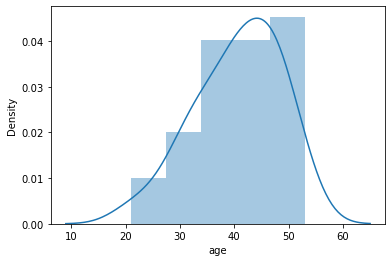

In [354]:
sns.distplot(train_unu_loan.age)
plt.show()

In [355]:
test_unu_loan.age.fillna(40,inplace = True)

In [356]:
test_unu_loan.isnull().sum()

Unnamed: 0                              0
index                                   0
application_id                          0
is_applied                             18
birth_year                              0
gender                                  0
income_type                             0
employment_type                         0
houseown_type                           0
purpose                                 0
personal_rehabilitation_complete_yn     0
index.1                                 0
bank_id                                 0
product_id                              0
credit_score                            0
yearly_income                           0
desired_amount                          0
existing_loan_cnt                       0
existing_loan_amt                       0
근속개월                                    0
age                                     0
dtype: int64

In [358]:
test_unu_credit.application_id

0        186829
1        186829
2        186829
3        186829
4        186829
         ...   
1691    2161964
1692    2161964
1693    2161964
1694    2161964
1695    2161964
Name: application_id, Length: 1696, dtype: int64

In [359]:
test_unu_drop_na.application_id

0          61032
1          61032
2          61032
3          61032
4          61032
          ...   
15412    2166339
15413    2166339
15414    2166339
15415    2166339
15416    2166339
Name: application_id, Length: 15417, dtype: int64

In [62]:
test_unu_loan.to_csv('test_unu_loan_1013_결측처리완.csv')
test_unu_age.to_csv('test_unu_age_1013_결측처리완.csv')
test_unu_enter.to_csv('test_unu_enter_1013_결측처리완.csv')
test_unu_credit.to_csv('test_unu_credit_1013_결측처리완.csv')

train_unu_loan.to_csv('train_unu_loan_1013_결측처리완.csv')
train_unu_age.to_csv('train_unu_age_1013_결측처리완.csv')
train_unu_enter.to_csv('train_unu_enter_1013_결측처리완.csv')
train_unu_credit.to_csv('train_unu_credit_1013_결측처리완.csv')

In [63]:
#%%
# train_unu_age 스케일링을 위한 수치형, 범주형 나누기
train_unu_age_num = train_unu_age.copy()[['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', '근속개월']]
#%%
train_unu_age_ob = train_unu_age.copy().drop(['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', '근속개월'],axis=1)

In [64]:
#%%
# test_unu_age 스케일링을 위한 수치형, 범주형 나누기
test_unu_age_num = test_unu_age.copy()[['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', '근속개월']]
#%%
test_unu_age_ob = test_unu_age.copy().drop(['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', '근속개월'],axis=1)

In [66]:
print(train_unu_age.isnull().sum())
print(test_unu_age.isnull().sum())

application_id                         0
bank_id                                0
product_id                             0
loan_limit                             0
loan_rate                              0
is_applied                             0
credit_score                           0
yearly_income                          0
income_type                            0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
근속개월                                   0
dtype: int64
application_id                           0
bank_id                                  0
product_id                               0
loan_limit                               0
loan_rate                                0
is_applied                             190
credit_score                    

In [67]:
#%%
# 이상치가 존재하므로 수치형 변수 unu_age 스케일링
# 결측치가 존재하는 데이터로 정규화해주면, 행 전부 결측치가 됨
# 결측치를 제외한 데이터를 fit, transform으로 적용
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
#rbs.fit_transform(no_train_unu_age) # 결측치 없는 train데이터들로 fit시키고
train_unu_age_scaled = rbs.fit_transform(train_unu_age_num) #fit시킨 데이터 적용
test_unu_age_scaled = rbs.transform(test_unu_age_num) #fit시킨 데이터 적용

In [68]:
train_unu_age_scaled = pd.DataFrame(data = train_unu_age_scaled )
test_unu_age_scaled = pd.DataFrame(data = test_unu_age_scaled)

In [70]:
train_unu_age_scaled.columns = ['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', '근속개월']
#%%
test_unu_age_scaled.columns = ['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', '근속개월']

In [72]:
#%%
# train_gen_ob셋은 원래 데이터 셋에서 행들을 제거해준것이기 때문에 인덱스가 일정하지 않음
# train_gen_scaled는 새로 추출해서 한 값이기에 인덱스가 1~800000까지 일정
train_unu_age_scaled.reset_index(drop = False, inplace = True)
train_unu_age_ob.reset_index(drop = False, inplace = True)

test_unu_age_scaled.reset_index(drop = False, inplace = True)
test_unu_age_ob.reset_index(drop = False, inplace = True)

In [73]:
train_unu_age_sca = pd.concat([train_unu_age_ob,train_unu_age_scaled],axis=1)
test_unu_age_sca = pd.concat([test_unu_age_ob,test_unu_age_scaled],axis=1)

In [76]:
print(train_unu_age_sca.shape)
train_unu_age.shape

(203, 19)


(203, 17)

In [77]:
print(test_unu_age_sca.shape)
test_unu_age.shape

(190, 19)


(190, 17)

In [78]:
train_unu_age_sca.to_csv('train_unu_age_sca_1013.csv')
test_unu_age_sca.to_csv('test_unu_age_sca_1013.csv')

In [80]:
train_unu_enter.columns

Index(['application_id', 'bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'is_applied', 'gender', 'credit_score', 'yearly_income', 'income_type',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt', 'age'],
      dtype='object')

In [81]:
train_unu_enter_num = train_unu_enter.copy()[['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', 'age']]
#%%
train_unu_enter_ob = train_unu_enter.copy().drop(['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', 'age'],axis=1)

In [82]:
test_unu_enter_num = test_unu_enter.copy()[['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', 'age']]
#%%
test_unu_enter_ob = test_unu_enter.copy().drop(['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', 'age'],axis=1)

In [83]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
#rbs.fit_transform(no_train_unu_enter) # 결측치 없는 train데이터들로 fit시키고
train_unu_enter_scaled = rbs.fit_transform(train_unu_enter_num) #fit시킨 데이터 적용
test_unu_enter_scaled = rbs.transform(test_unu_enter_num) #fit시킨 데이터 적용

In [84]:
train_unu_enter_scaled = pd.DataFrame(data = train_unu_enter_scaled )
test_unu_enter_scaled = pd.DataFrame(data = test_unu_enter_scaled)

In [85]:
# 변수명 삽입
train_unu_enter_scaled.columns = ['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', 'age']
#%%
test_unu_enter_scaled.columns = ['bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income','desired_amount',
       'existing_loan_cnt', 'existing_loan_amt', 'age']

In [86]:
train_unu_enter_scaled.reset_index(drop = False, inplace = True)
train_unu_enter_ob.reset_index(drop = False, inplace = True)

test_unu_enter_scaled.reset_index(drop = False, inplace = True)
test_unu_enter_ob.reset_index(drop = False, inplace = True)

In [87]:
train_unu_enter_sca = pd.concat([train_unu_enter_ob,train_unu_enter_scaled],axis=1)
test_unu_enter_sca = pd.concat([test_unu_enter_ob,test_unu_enter_scaled],axis=1)

In [88]:
print(train_unu_enter_sca.shape)
train_unu_enter.shape

(1120, 20)


(1120, 18)

In [89]:
print(test_unu_enter_sca.shape)
test_unu_enter.shape

(854, 21)


(854, 19)

In [90]:
train_unu_enter_sca.to_csv('train_unu_enter_sca_1013.csv')
test_unu_enter_sca.to_csv('test_unu_enter_sca_1013.csv')

In [91]:
train_unu_loan_num = train_unu_loan.copy()[['bank_id', 'product_id',
       'credit_score', 'yearly_income', 'desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age']]
#%%
train_unu_loan_ob = train_unu_loan.copy().drop(['bank_id', 'product_id',
       'credit_score', 'yearly_income', 'desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age'],axis=1)

In [92]:
test_unu_loan_num = test_unu_loan.copy()[['bank_id', 'product_id',
       'credit_score', 'yearly_income', 'desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age']]
#%%
test_unu_loan_ob = test_unu_loan.copy().drop(['bank_id', 'product_id',
       'credit_score', 'yearly_income', 'desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age'],axis=1)

In [93]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
#rbs.fit_transform(no_train_unu_loan) # 결측치 없는 train데이터들로 fit시키고
train_unu_loan_scaled = rbs.fit_transform(train_unu_loan_num) #fit시킨 데이터 적용
test_unu_loan_scaled = rbs.transform(test_unu_loan_num) #fit시킨 데이터 적용

In [94]:
train_unu_loan_scaled = pd.DataFrame(data = train_unu_loan_scaled )
test_unu_loan_scaled = pd.DataFrame(data = test_unu_loan_scaled)

In [95]:
train_unu_loan_scaled.columns = ['bank_id', 'product_id',
       'credit_score', 'yearly_income', 'desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age']
#%%
test_unu_loan_scaled.columns = ['bank_id', 'product_id',
       'credit_score', 'yearly_income', 'desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age']

In [96]:
#%%
# train_gen_ob셋은 원래 데이터 셋에서 행들을 제거해준것이기 때문에 인덱스가 일정하지 않음
# train_gen_scaled는 새로 추출해서 한 값이기에 인덱스가 1~800000까지 일정
train_unu_loan_scaled.reset_index(drop = False, inplace = True)
train_unu_loan_ob.reset_index(drop = False, inplace = True)

test_unu_loan_scaled.reset_index(drop = False, inplace = True)
test_unu_loan_ob.reset_index(drop = False, inplace = True)

In [97]:
train_unu_loan_sca = pd.concat([train_unu_loan_ob,train_unu_loan_scaled],axis=1)
test_unu_loan_sca = pd.concat([test_unu_loan_ob,test_unu_loan_scaled],axis=1)

In [98]:
print(train_unu_loan_sca.shape)
train_unu_loan.shape

(31, 19)


(31, 17)

In [99]:
print(test_unu_loan_sca.shape)
test_unu_loan.shape

(18, 20)


(18, 18)

In [117]:
train_unu_loan_sca.to_csv('train_unu_loan_sca_1013.csv')
test_unu_loan_sca.to_csv('test_unu_loan_sca_1013.csv')

In [103]:
train_unu_drop_na = pd.read_csv('train_unu_drop_na_1013.csv')

In [363]:
# train_gen 스케일링을 위한 수치형, 범주형 나누기
train_unu_num = train_unu_drop_na.copy()[['bank_id', 'product_id', 'loan_limit', 'loan_rate', 
       'credit_score', 'yearly_income','desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age']]
#%%
train_unu_ob = train_unu_drop_na.copy().drop(['bank_id', 'product_id', 'loan_limit', 'loan_rate', 
       'credit_score', 'yearly_income','desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age'],axis=1)

In [366]:
test_unu_drop_na.application_id.describe()

count     15417.00
mean    1093618.99
std      635105.91
min        3118.00
25%      529737.00
50%     1099823.00
75%     1643489.00
max     2166339.00
Name: application_id, dtype: float64

In [367]:
test_unu_credit.application_id.describe()

count      1696.00
mean     976706.75
std      653534.36
min        7599.00
25%      420682.00
50%      916735.00
75%     1585281.00
max     2161964.00
Name: application_id, dtype: float64

In [369]:
# train_gen 스케일링을 위한 수치형, 범주형 나누기
test_unu_credit_num = test_unu_credit.copy()[['bank_id', 'product_id', 'loan_limit', 'loan_rate', 
       'credit_score', 'yearly_income','desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age']]
#%%
test_unu_credit_ob = test_unu_credit.copy().drop(['bank_id', 'product_id', 'loan_limit', 'loan_rate', 
       'credit_score', 'yearly_income','desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age'],axis=1)

In [370]:
test_unu_drop_na = pd.read_csv('test_unu_drop_na_1013.csv')

In [371]:
# train_gen 스케일링을 위한 수치형, 범주형 나누기
test_unu_num = test_unu_drop_na.copy()[['bank_id', 'product_id', 'loan_limit', 'loan_rate', 
       'credit_score', 'yearly_income','desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age']]
#%%
test_unu_ob = test_unu_drop_na.copy().drop(['bank_id', 'product_id', 'loan_limit', 'loan_rate', 
       'credit_score', 'yearly_income','desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age'],axis=1)

In [375]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
#rbs.fit_transform(no_train_gen) # 결측치 없는 train데이터들로 fit시키고
train_unu_scaled = rbs.fit_transform(train_unu_num) #fit시킨 데이터 적용
test_unu_credit_scaled = rbs.transform(test_unu_credit_num) #fit시킨 데이터 적용

In [385]:
#%%
train_unu_scaled = pd.DataFrame(data = train_unu_scaled)
test_unu_credit_scaled = pd.DataFrame(data = test_unu_credit_scaled)
test_unu_scaled = pd.DataFrame(data = test_unu_scaled)

In [386]:
#%%
train_unu_scaled.columns = ['bank_id', 'product_id', 'loan_limit', 'loan_rate', 
       'credit_score', 'yearly_income','desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age']
#%%
test_unu_credit_scaled.columns = ['bank_id', 'product_id', 'loan_limit', 'loan_rate', 
       'credit_score', 'yearly_income','desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age']


ValueError: Length mismatch: Expected axis has 13 elements, new values have 11 elements

In [387]:
#%%
test_unu_scaled.columns = ['bank_id', 'product_id', 'loan_limit', 'loan_rate', 
       'credit_score', 'yearly_income','desired_amount','existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age']

In [388]:
train_unu_scaled.reset_index(drop = False, inplace = True)
train_unu_ob.reset_index(drop = False, inplace = True)

test_unu_scaled.reset_index(drop = False, inplace = True)
test_unu_ob.reset_index(drop = False, inplace = True)

ValueError: cannot insert level_0, already exists

In [379]:
test_unu_credit_sca = pd.concat([test_unu_credit_ob,test_unu_credit_scaled],axis=1)

In [381]:
test_unu_credit_sca.application_id.describe()

count      1696.00
mean     976706.75
std      653534.36
min        7599.00
25%      420682.00
50%      916735.00
75%     1585281.00
max     2161964.00
Name: application_id, dtype: float64

In [389]:
test_unu_sca.application_id.describe()

count     15417.00
mean    1093618.99
std      635105.91
min        3118.00
25%      529737.00
50%     1099823.00
75%     1643489.00
max     2166339.00
Name: application_id, dtype: float64

In [380]:
print(test_unu_credit.shape)
test_unu_credit_sca.shape

(1696, 20)


(1696, 22)

In [382]:
test_unu_credit_sca.to_csv('test_unu_credit_sca_1013.csv',index=False)

In [383]:
train_unu_scaled.reset_index(drop = False, inplace = True)
train_unu_ob.reset_index(drop = False, inplace = True)

test_unu_scaled.reset_index(drop = False, inplace = True)
test_unu_ob.reset_index(drop = False, inplace = True)

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [143]:
train_unu_sca = pd.concat([train_unu_ob,train_unu_scaled],axis=1)
test_unu_sca = pd.concat([test_unu_ob,test_unu_scaled],axis=1)

In [146]:
print(test_unu_sca.shape)
test_unu_drop_na.shape

(15417, 22)


(15417, 20)

In [147]:
print(train_unu_sca.shape)
train_unu_drop_na.shape

(19115, 22)


(19115, 19)

In [148]:
test_unu_sca.isnull().sum()

index                                      0
application_id                             0
is_applied                             15417
birth_year                                 0
gender                                     0
income_type                                0
employment_type                            0
houseown_type                              0
purpose                                    0
personal_rehabilitation_complete_yn        0
index                                      0
bank_id                                    0
product_id                                 0
loan_limit                                 0
loan_rate                                  0
credit_score                               0
yearly_income                              0
desired_amount                             0
existing_loan_cnt                          0
existing_loan_amt                          0
근속개월                                       0
age                                        0
dtype: int

In [149]:
train_unu_sca.to_csv('train_unu_sca_drop_na_1013.csv')
test_unu_sca.to_csv('test_unu_sca_drop_na_1013.csv')

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [153]:
from xgboost import XGBClassifier
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

##  unu_drop_na예측 , test_credit도 같이 예측

In [192]:
final_drop_na = pd.get_dummies(train_unu_sca,columns = [ 'income_type',
       'employment_type', 'houseown_type', 'purpose'])

In [257]:
final_loan = pd.get_dummies(train_unu_loan_sca,columns = [ 'income_type',
       'employment_type', 'houseown_type', 'purpose'])

In [273]:
final_age = pd.get_dummies(train_unu_age_sca,columns = [ 'income_type',
       'employment_type', 'houseown_type', 'purpose'])

In [292]:
final_enter = pd.get_dummies(train_unu_enter_sca,columns = [ 'income_type',
       'employment_type', 'houseown_type', 'purpose'])

In [294]:
final_enter.shape

(1120, 30)

In [258]:
final_loan

,index,application_id,is_applied,gender,personal_rehabilitation_complete_yn,index,bank_id,product_id,credit_score,yearly_income,...,employment_type_기타,employment_type_정규직,houseown_type_기타가족소유,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_전월세보증금
0,0,92246,1.00,0.00,0.00,0,0.70,0.00,-0.11,0.43,...,1,0,0,1,0,0,1,0,0,0
1,1,255379,1.00,0.00,1.00,1,-0.48,-0.92,-5.67,-0.43,...,0,1,0,0,1,0,0,0,1,0
2,2,296893,1.00,1.00,0.00,2,-0.13,-0.53,0.67,0.93,...,0,1,0,1,0,0,0,1,0,0
3,3,326399,1.00,1.00,0.00,3,0.00,1.39,-1.22,0.71,...,0,1,0,0,1,0,0,1,0,0
4,4,336783,1.00,1.00,1.00,4,-0.48,-0.92,-5.67,0.21,...,0,1,1,0,0,0,0,0,1,0
5,5,451625,1.00,0.00,0.00,5,-0.48,-1.47,-0.33,0.79,...,0,1,0,0,1,0,0,0,1,0
6,6,508321,1.00,0.00,0.00,6,0.00,1.39,1.33,-2.00,...,0,0,0,0,1,0,0,0,1,0
7,7,544682,1.00,1.00,1.00,7,-0.48,-0.92,1.57,0.07,...,0,1,1,0,0,0,0,0,1,0
8,8,746499,1.00,1.00,0.00,8,1.65,-2.69,0.33,0.00,...,0,1,1,0,0,0,0,0,1,0
9,9,780084,1.00,1.00,0.00,9,0.70,0.00,0.00,0.21,...,0,1,0,0,1,0,0,0,1,0


In [295]:
# loan
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=777)
for train_idx, test_idx in split.split(final_enter, final_enter["is_applied"]):
    tr_enter = final_enter.loc[train_idx]
    val_enter = final_enter.loc[test_idx]

In [193]:
# drop_na
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=777)
for train_idx, test_idx in split.split(final_drop_na, final_drop_na["is_applied"]):
    tr = final_drop_na.loc[train_idx]
    val = final_drop_na.loc[test_idx]

In [194]:
print(tr["is_applied"].value_counts() / len(tr))
val["is_applied"].value_counts() / len(val)

0.00   0.90
1.00   0.10
Name: is_applied, dtype: float64


0.00   0.90
1.00   0.10
Name: is_applied, dtype: float64

In [195]:
x_train

,application_id,is_applied,gender,personal_rehabilitation_complete_yn,bank_id,product_id,loan_limit,loan_rate,credit_score,yearly_income,...,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자
4441,484285,0.00,0.00,0.00,0.86,0.80,-0.15,-0.77,-0.40,-0.41,...,0,1,0,1,0,0,0,0,0,0
19061,2159847,0.00,1.00,0.00,0.00,-0.93,-0.70,0.19,-0.13,-0.29,...,1,0,0,0,0,1,0,0,0,0
13900,1580884,0.00,0.00,0.00,-0.79,-0.20,-0.60,0.86,-0.73,-1.76,...,0,1,1,0,0,0,0,0,0,0
6107,697377,0.00,1.00,0.00,0.00,-0.86,0.95,0.48,-0.20,0.76,...,0,1,0,0,0,1,0,0,0,0
16024,1809260,0.00,0.00,1.00,-0.07,-0.30,0.30,0.32,0.07,-0.47,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,817559,0.00,0.00,0.00,-0.18,-0.49,0.00,0.36,-0.73,-1.76,...,0,1,0,0,0,1,0,0,0,0
13543,1544838,0.00,1.00,0.00,0.25,0.86,1.15,0.46,0.13,0.06,...,1,0,0,1,0,0,0,0,0,0
788,78680,0.00,1.00,0.00,-0.25,0.54,-0.65,0.85,0.47,-0.06,...,0,1,0,0,0,1,0,0,0,0
10064,1162281,0.00,1.00,0.00,1.00,0.61,0.75,0.32,-0.27,1.12,...,0,1,0,0,0,1,0,0,0,0


In [196]:
x_train=tr.drop(['is_applied','houseown_type_자가', 'application_id','level_0','index'], axis=1)
y_train=tr['is_applied']

In [198]:
x_val=val.drop(['is_applied','houseown_type_자가', 'application_id','level_0','index'], axis=1)
y_val=val['is_applied']

In [296]:
tr_enter.columns

Index(['index', 'application_id', 'is_applied', 'gender',
       'personal_rehabilitation_complete_yn', 'index', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'credit_score', 'yearly_income',
       'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', 'age',
       'income_type_OTHERINCOME', 'employment_type_계약직', 'employment_type_기타',
       'houseown_type_기타가족소유', 'houseown_type_자가', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_자동차구입', 'purpose_전월세보증금', 'purpose_주택구입', 'purpose_투자'],
      dtype='object')

In [299]:
x_enter=tr_enter.drop(['is_applied','houseown_type_자가', 'application_id','index'], axis=1)
y_enter=tr_enter['is_applied']

In [319]:
x_enter = x_enter.drop(['employment_type_계약직'],axis=1)

In [300]:
x_val=val.drop(['is_applied','houseown_type_자가', 'application_id','index'], axis=1)
y_val=val['is_applied']

In [199]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(x_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (14336, 32) (14336,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (25664, 32) (25664,)
SMOTE 적용 후 값의 분포 :
 1.00    12832
0.00    12832
Name: is_applied, dtype: int64


In [320]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_enter_ov, y_enter_ov = smote.fit_resample(x_enter, y_enter)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", x_enter.shape, y_enter.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', x_enter_ov.shape, y_enter_ov.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_enter_ov).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (840, 24) (840,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (1300, 24) (1300,)
SMOTE 적용 후 값의 분포 :
 0.00    650
1.00    650
Name: is_applied, dtype: int64


In [263]:
final_loan.columns

Index(['application_id', 'is_applied', 'gender',
       'personal_rehabilitation_complete_yn', 'bank_id', 'product_id',
       'credit_score', 'yearly_income', 'desired_amount', 'existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age', 'income_type_EARNEDINCOME',
       'income_type_EARNEDINCOME2', 'income_type_FREELANCER',
       'income_type_OTHERINCOME', 'income_type_PRIVATEBUSINESS',
       'employment_type_계약직', 'employment_type_기타', 'employment_type_정규직',
       'houseown_type_기타가족소유', 'houseown_type_자가', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_전월세보증금'],
      dtype='object')

In [262]:
final_loan.drop(['index'],axis=1,inplace=True)

KeyError: "['index'] not found in axis"

In [264]:
loan_x=final_loan.drop(['is_applied','houseown_type_자가', 'application_id'], axis=1)
loan_y=final_loan['is_applied']

In [413]:
test_unu_age.columns

Index(['application_id', 'bank_id', 'product_id', 'loan_limit', 'loan_rate',
       'is_applied', 'credit_score', 'yearly_income', 'income_type',
       'employment_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt', '근속개월'],
      dtype='object')

In [415]:
age_x = test_unu_age.drop(['application_id','is_applied'],axis=1)
age_y = test_unu_age['is_applied']

In [ ]:
final_loan.drop(['index'],axis=1,inplace=True)

In [287]:
age_x.drop(['index'],axis=1,inplace=True)

In [288]:
age_x.columns

Index(['personal_rehabilitation_complete_yn', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'credit_score', 'yearly_income',
       'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', '근속개월',
       'income_type_EARNEDINCOME', 'income_type_EARNEDINCOME2',
       'income_type_FREELANCER', 'income_type_OTHERINCOME',
       'income_type_PRACTITIONER', 'employment_type_계약직', 'employment_type_기타',
       'employment_type_정규직', 'houseown_type_기타가족소유', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_생활비'],
      dtype='object')

In [418]:
final_age = pd.get_dummies(train_unu_age_sca,columns = [ 'income_type',
       'employment_type', 'houseown_type', 'purpose'])

In [422]:
test_age = pd.get_dummies(test_unu_age_sca,columns = [ 'income_type',
       'employment_type', 'houseown_type', 'purpose'])

In [423]:
test_age.columns

Index(['index', 'application_id', 'is_applied',
       'personal_rehabilitation_complete_yn', 'index', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'credit_score', 'yearly_income',
       'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', '근속개월',
       'income_type_EARNEDINCOME', 'income_type_EARNEDINCOME2',
       'income_type_FREELANCER', 'income_type_PRACTITIONER',
       'income_type_PRIVATEBUSINESS', 'employment_type_계약직',
       'employment_type_기타', 'employment_type_일용직', 'employment_type_정규직',
       'houseown_type_기타가족소유', 'houseown_type_자가', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_전월세보증금', 'purpose_주택구입'],
      dtype='object')

In [426]:
final_age.columns

Index(['index', 'application_id', 'is_applied',
       'personal_rehabilitation_complete_yn', 'index', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'credit_score', 'yearly_income',
       'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', '근속개월',
       'income_type_EARNEDINCOME', 'income_type_EARNEDINCOME2',
       'income_type_FREELANCER', 'income_type_OTHERINCOME',
       'income_type_PRACTITIONER', 'employment_type_계약직', 'employment_type_기타',
       'employment_type_정규직', 'houseown_type_기타가족소유', 'houseown_type_자가',
       'houseown_type_전월세', 'purpose_기타', 'purpose_대환대출', 'purpose_생활비'],
      dtype='object')

In [427]:
age_x=final_age.drop(['index','income_type_OTHERINCOME','application_id',
                      'employment_type_계약직','is_applied','houseown_type_자가', 
                      'application_id'], axis=1)
age_y=final_age['is_applied']

In [428]:
test_age.drop(['income_type_PRIVATEBUSINESS','purpose_전월세보증금', 'purpose_주택구입','purpose_생활비',
               'index','is_applied','employment_type_일용직','houseown_type_자가','purpose_사업자금','application_id'
              ],axis=1,inplace=True)

In [430]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_age_over, y_age_over = smote.fit_resample(age_x, age_y)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", age_x.shape, age_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', x_age_over.shape, y_age_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_age_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (203, 22) (203,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (334, 22) (334,)
SMOTE 적용 후 값의 분포 :
 1.00    167
0.00    167
Name: is_applied, dtype: int64


In [417]:
final_age.columns

Index(['index', 'application_id', 'is_applied',
       'personal_rehabilitation_complete_yn', 'index', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'credit_score', 'yearly_income',
       'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', '근속개월',
       'income_type_EARNEDINCOME', 'income_type_EARNEDINCOME2',
       'income_type_FREELANCER', 'income_type_PRACTITIONER',
       'income_type_PRIVATEBUSINESS', 'employment_type_계약직',
       'employment_type_기타', 'employment_type_일용직', 'employment_type_정규직',
       'houseown_type_기타가족소유', 'houseown_type_자가', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_전월세보증금', 'purpose_주택구입'],
      dtype='object')

In [267]:
final_loan.is_applied.unique()

array([1.])

In [321]:
xgb_enter = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    )

In [322]:
xgb_enter.fit(x_enter_ov,y_enter_ov)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [404]:
xgb_credit = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    )

In [405]:
cr_train = X_train_over.drop(['purpose_자동차구입','purpose_주택구입'],axis=1)

In [406]:
xgb_credit.fit(cr_train, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [200]:
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    )

In [204]:
xgb1.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [290]:
xgb_age = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    )

In [431]:
xgb_age.fit(x_age_over,y_age_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [265]:
xgb_loan = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    )

In [266]:
xgb_loan.fit(x_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [1.]

In [205]:
pred = xgb1.predict(x_val)

In [206]:
print(classification_report(y_val, pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.92      0.97      0.94      4278
     class 1       0.52      0.31      0.38       501

    accuracy                           0.90      4779
   macro avg       0.72      0.64      0.66      4779
weighted avg       0.88      0.90      0.89      4779



In [208]:
test_unu_sca.columns

Index(['index', 'application_id', 'is_applied', 'birth_year', 'gender',
       'income_type', 'employment_type', 'houseown_type', 'purpose',
       'personal_rehabilitation_complete_yn', 'index', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'credit_score', 'yearly_income',
       'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', '근속개월',
       'age'],
      dtype='object')

In [211]:
test_unu_sca.drop(['index'], axis=1, inplace=True)

In [213]:
## 더미변수 생성
test=pd.get_dummies(test_unu_sca, columns=['income_type', 'employment_type', 'houseown_type', 'purpose'])

In [271]:
## 더미변수 생성
test_age=pd.get_dummies(test_unu_age_sca, columns=['income_type', 'employment_type', 'houseown_type', 'purpose'])

In [272]:
test_age.drop(['is_applied','houseown_type_자가','application_id'],axis=1,inplace=True)

In [221]:
test_x=test.drop(['is_applied','houseown_type_자가','application_id'], axis=1)

In [393]:
## 더미변수 생성
test_cr=pd.get_dummies(test_unu_credit_sca, columns=['income_type', 'employment_type', 'houseown_type', 'purpose'])

In [394]:
test_cr.shape

(1696, 36)

In [395]:
test_x=test_x.drop(['birth_year','houseown_type_배우자'], axis=1)

KeyError: "['birth_year' 'houseown_type_배우자'] not found in axis"

In [397]:
test_cr.columns

Index(['index', 'application_id', 'is_applied', 'birth_year', 'gender',
       'personal_rehabilitation_complete_yn', 'index', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'credit_score', 'yearly_income',
       'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', '근속개월',
       'age', 'income_type_EARNEDINCOME', 'income_type_EARNEDINCOME2',
       'income_type_FREELANCER', 'income_type_PRACTITIONER',
       'income_type_PRIVATEBUSINESS', 'employment_type_계약직',
       'employment_type_기타', 'employment_type_일용직', 'employment_type_정규직',
       'houseown_type_기타가족소유', 'houseown_type_자가', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_전월세보증금', 'purpose_주택구입'],
      dtype='object')

In [ ]:
x_train

In [398]:
test_cr.drop(['is_applied','houseown_type_자가','application_id','birth_year'],axis=1,inplace=True)

In [249]:
test_cr.drop(['index'],axis=1,inplace=True)

In [306]:
## 더미변수 생성
test_enter=pd.get_dummies(test_unu_enter_sca, columns=['income_type', 'employment_type', 'houseown_type', 'purpose'])

In [312]:
test_enter.columns

Index(['index', 'application_id', 'is_applied', 'birth_year', 'gender',
       'personal_rehabilitation_complete_yn', 'index', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'credit_score', 'yearly_income',
       'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', 'age',
       'income_type_OTHERINCOME', 'employment_type_기타', 'employment_type_정규직',
       'houseown_type_기타가족소유', 'houseown_type_자가', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_자동차구입', 'purpose_전월세보증금', 'purpose_주택구입', 'purpose_투자'],
      dtype='object')

In [313]:
test_enter=test_enter.drop(['index','birth_year','is_applied','application_id'], axis=1)

In [323]:
test_enter=test_enter.drop(['employment_type_정규직','houseown_type_자가'], axis=1)

In [317]:
x_enter_ov.columns

Index(['gender', 'personal_rehabilitation_complete_yn', 'bank_id',
       'product_id', 'loan_limit', 'loan_rate', 'credit_score',
       'yearly_income', 'desired_amount', 'existing_loan_cnt',
       'existing_loan_amt', 'age', 'income_type_OTHERINCOME',
       'employment_type_계약직', 'employment_type_기타', 'houseown_type_기타가족소유',
       'houseown_type_전월세', 'purpose_기타', 'purpose_대환대출', 'purpose_사업자금',
       'purpose_생활비', 'purpose_자동차구입', 'purpose_전월세보증금', 'purpose_주택구입',
       'purpose_투자'],
      dtype='object')

In [318]:
test_enter.columns

Index(['gender', 'personal_rehabilitation_complete_yn', 'bank_id',
       'product_id', 'loan_limit', 'loan_rate', 'credit_score',
       'yearly_income', 'desired_amount', 'existing_loan_cnt',
       'existing_loan_amt', 'age', 'income_type_OTHERINCOME',
       'employment_type_기타', 'employment_type_정규직', 'houseown_type_기타가족소유',
       'houseown_type_자가', 'houseown_type_전월세', 'purpose_기타', 'purpose_대환대출',
       'purpose_사업자금', 'purpose_생활비', 'purpose_자동차구입', 'purpose_전월세보증금',
       'purpose_주택구입', 'purpose_투자'],
      dtype='object')

In [324]:
enter_pred= xgb_enter.predict(test_enter)

In [332]:
unu_enter = test_unu_enter_sca.copy()
unu_enter['is_applied'] = enter_pred
unu_enter

,index,application_id,is_applied,birth_year,gender,income_type,employment_type,houseown_type,purpose,personal_rehabilitation_complete_yn,...,bank_id,product_id,loan_limit,loan_rate,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,age
0,0,21602,0,1993.00,1.00,OTHERINCOME,기타,자가,대환대출,0.00,...,-0.64,0.00,0.71,0.76,-0.44,-0.84,-0.40,0.00,0.27,-1.11
1,1,21602,0,1993.00,1.00,OTHERINCOME,기타,자가,대환대출,0.00,...,0.52,0.80,0.88,-0.09,-0.44,-0.84,-0.40,0.00,0.27,-1.11
2,2,21602,0,1993.00,1.00,OTHERINCOME,기타,자가,대환대출,0.00,...,-0.56,0.48,-0.29,0.29,-0.44,-0.84,-0.40,0.00,0.27,-1.11
3,3,30201,0,1993.00,1.00,OTHERINCOME,기타,전월세,생활비,0.00,...,-0.60,0.03,-0.41,0.05,0.19,0.44,-0.33,1.50,1.80,-1.11
4,4,30201,1,1993.00,1.00,OTHERINCOME,기타,전월세,생활비,0.00,...,0.24,-0.56,-0.29,0.16,0.19,0.44,-0.33,1.50,1.80,-1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,849,2161940,0,1977.00,0.00,OTHERINCOME,기타,전월세,생활비,0.00,...,-1.12,-0.37,-0.41,-0.38,-0.06,-0.56,-0.27,1.00,2.20,-0.22
850,850,2161940,0,1977.00,0.00,OTHERINCOME,기타,전월세,생활비,0.00,...,-0.60,0.44,0.41,-0.47,-0.06,-0.56,-0.27,1.00,2.20,-0.22
851,851,2161940,0,1977.00,0.00,OTHERINCOME,기타,전월세,생활비,0.00,...,0.24,-0.56,-0.29,-0.86,-0.06,-0.56,-0.27,1.00,2.20,-0.22
852,852,2161940,0,1977.00,0.00,OTHERINCOME,기타,전월세,생활비,0.00,...,-0.32,0.43,0.24,-0.97,-0.06,-0.56,-0.27,1.00,2.20,-0.22


In [333]:
unu_enter.to_csv('unu_enter_예측완_1013.csv',index=False)

In [217]:
x_train.columns

Index(['gender', 'personal_rehabilitation_complete_yn', 'bank_id',
       'product_id', 'loan_limit', 'loan_rate', 'credit_score',
       'yearly_income', 'desired_amount', 'existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age', 'income_type_EARNEDINCOME',
       'income_type_EARNEDINCOME2', 'income_type_FREELANCER',
       'income_type_PRACTITIONER', 'income_type_PRIVATEBUSINESS',
       'employment_type_계약직', 'employment_type_기타', 'employment_type_일용직',
       'employment_type_정규직', 'houseown_type_기타가족소유', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_자동차구입', 'purpose_전월세보증금', 'purpose_주택구입', 'purpose_투자'],
      dtype='object')

In [216]:
test_x.columns

Index(['birth_year', 'gender', 'personal_rehabilitation_complete_yn',
       'bank_id', 'product_id', 'loan_limit', 'loan_rate', 'credit_score',
       'yearly_income', 'desired_amount', 'existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age', 'income_type_EARNEDINCOME',
       'income_type_EARNEDINCOME2', 'income_type_FREELANCER',
       'income_type_PRACTITIONER', 'income_type_PRIVATEBUSINESS',
       'employment_type_계약직', 'employment_type_기타', 'employment_type_일용직',
       'employment_type_정규직', 'houseown_type_기타가족소유', 'houseown_type_배우자',
       'houseown_type_전월세', 'purpose_기타', 'purpose_대환대출', 'purpose_사업자금',
       'purpose_생활비', 'purpose_자동차구입', 'purpose_전월세보증금', 'purpose_주택구입',
       'purpose_투자'],
      dtype='object')

In [220]:
test_x.columns

Index(['application_id', 'is_applied', 'gender',
       'personal_rehabilitation_complete_yn', 'bank_id', 'product_id',
       'loan_limit', 'loan_rate', 'credit_score', 'yearly_income',
       'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', '근속개월',
       'age', 'income_type_EARNEDINCOME', 'income_type_EARNEDINCOME2',
       'income_type_FREELANCER', 'income_type_PRACTITIONER',
       'income_type_PRIVATEBUSINESS', 'employment_type_계약직',
       'employment_type_기타', 'employment_type_일용직', 'employment_type_정규직',
       'houseown_type_기타가족소유', 'houseown_type_자가', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_자동차구입', 'purpose_전월세보증금', 'purpose_주택구입', 'purpose_투자'],
      dtype='object')

In [400]:
X_train_over.columns

Index(['gender', 'personal_rehabilitation_complete_yn', 'bank_id',
       'product_id', 'loan_limit', 'loan_rate', 'credit_score',
       'yearly_income', 'desired_amount', 'existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age', 'income_type_EARNEDINCOME',
       'income_type_EARNEDINCOME2', 'income_type_FREELANCER',
       'income_type_PRACTITIONER', 'income_type_PRIVATEBUSINESS',
       'employment_type_계약직', 'employment_type_기타', 'employment_type_일용직',
       'employment_type_정규직', 'houseown_type_기타가족소유', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_자동차구입', 'purpose_전월세보증금', 'purpose_주택구입', 'purpose_투자'],
      dtype='object')

In [402]:
test_cr.drop(['index'],axis=1,inplace=True)

In [403]:
test_cr.columns

Index(['gender', 'personal_rehabilitation_complete_yn', 'bank_id',
       'product_id', 'loan_limit', 'loan_rate', 'credit_score',
       'yearly_income', 'desired_amount', 'existing_loan_cnt',
       'existing_loan_amt', '근속개월', 'age', 'income_type_EARNEDINCOME',
       'income_type_EARNEDINCOME2', 'income_type_FREELANCER',
       'income_type_PRACTITIONER', 'income_type_PRIVATEBUSINESS',
       'employment_type_계약직', 'employment_type_기타', 'employment_type_일용직',
       'employment_type_정규직', 'houseown_type_기타가족소유', 'houseown_type_전월세',
       'purpose_기타', 'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비',
       'purpose_전월세보증금', 'purpose_주택구입'],
      dtype='object')

In [432]:
age_pred = xgb_age.predict(test_age)

In [434]:
unu_age = test_unu_age_sca.copy()
unu_age.is_applied = age_pred
unu_age.is_applied.value_counts()

0    106
1     84
Name: is_applied, dtype: int64

In [436]:
unu_age.to_csv('unu_age_예측진짜완_1013.csv')

In [435]:
test_unu_age

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,근속개월
0,532274,46,49,30000000.00,16.20,nan,630.00,48000000.00,EARNEDINCOME,정규직,기타가족소유,80000000.00,전월세보증금,0.00,1.00,11000000.00,15.00
1,532274,22,221,7000000.00,18.40,nan,630.00,48000000.00,EARNEDINCOME,정규직,기타가족소유,80000000.00,전월세보증금,0.00,1.00,11000000.00,15.00
2,532274,13,123,15000000.00,18.60,nan,630.00,48000000.00,EARNEDINCOME,정규직,기타가족소유,80000000.00,전월세보증금,0.00,1.00,11000000.00,15.00
3,532274,29,265,20000000.00,9.70,nan,630.00,48000000.00,EARNEDINCOME,정규직,기타가족소유,80000000.00,전월세보증금,0.00,1.00,11000000.00,15.00
4,532274,56,5,25000000.00,16.30,nan,630.00,48000000.00,EARNEDINCOME,정규직,기타가족소유,80000000.00,전월세보증금,0.00,1.00,11000000.00,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2056644,42,90,21000000.00,14.50,nan,700.00,23000000.00,EARNEDINCOME,정규직,전월세,150000000.00,전월세보증금,0.00,2.00,11000000.00,22.00
186,2056644,30,85,15000000.00,14.30,nan,700.00,23000000.00,EARNEDINCOME,정규직,전월세,150000000.00,전월세보증금,0.00,2.00,11000000.00,22.00
187,2056644,13,123,20000000.00,17.50,nan,700.00,23000000.00,EARNEDINCOME,정규직,전월세,150000000.00,전월세보증금,0.00,2.00,11000000.00,22.00
188,2056644,1,61,18000000.00,15.40,nan,700.00,23000000.00,EARNEDINCOME,정규직,전월세,150000000.00,전월세보증금,0.00,2.00,11000000.00,22.00


In [227]:
xgb1_pred=xgb1.predict(test_x)
xgb1_pred

array([0, 0, 0, ..., 0, 0, 0])

In [326]:
enter_pred= xgb_enter.predict(test_enter)

In [407]:
xgb_cr_pred=xgb_credit.predict(test_cr)
xgb_cr_pred

array([0, 0, 0, ..., 0, 0, 0])

In [408]:
unu_credit = test_unu_credit_sca.copy()
unu_credit['is_applied']=xgb_cr_pred
unu_credit.tail()

,index,application_id,is_applied,birth_year,gender,income_type,employment_type,houseown_type,purpose,personal_rehabilitation_complete_yn,...,product_id,loan_limit,loan_rate,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,근속개월,age
1691,1691,2161964,0,1985.00,1.00,EARNEDINCOME,정규직,기타가족소유,생활비,0.00,...,0.85,0.05,-0.72,nan,-0.18,-0.44,-1.00,-0.64,0.38,-0.33
1692,1692,2161964,1,1985.00,1.00,EARNEDINCOME,정규직,기타가족소유,생활비,0.00,...,-0.09,0.15,-0.79,nan,-0.18,-0.44,-1.00,-0.64,0.38,-0.33
1693,1693,2161964,0,1976.00,1.00,EARNEDINCOME,정규직,기타가족소유,생활비,0.00,...,-0.78,0.05,-0.72,nan,-0.18,-0.44,-1.00,-0.64,0.38,0.27
1694,1694,2161964,0,1976.00,1.00,EARNEDINCOME,정규직,기타가족소유,생활비,0.00,...,-0.79,0.05,-0.77,nan,-0.18,-0.44,-1.00,-0.64,0.38,0.27
1695,1695,2161964,0,1976.00,1.00,EARNEDINCOME,정규직,기타가족소유,생활비,0.00,...,0.80,0.05,-0.78,nan,-0.18,-0.44,-1.00,-0.64,0.38,0.27


In [411]:
unu_credit.to_csv('unu_credit_예측완_1013_제대로.csv',index=False)

In [228]:
a1 = pd.DataFrame(xgb1_pred)
a1.tail()

,0
15412,0
15413,0
15414,0
15415,0
15416,0


In [251]:
a2 = pd.DataFrame(xgb_cr_pred)
a2.tail()

,0
15412,0
15413,0
15414,0
15415,0
15416,0


In [327]:
a3 = pd.DataFrame(enter_pred)
a3.tail()

,0
849,0
850,0
851,0
852,0
853,0


In [330]:
unu_drop_na = test_unu_drop_na.copy()
unu_drop_na['is_applied']=xgb1_pred
unu_drop_na.tail()

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,birth_year,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,근속개월,age
15412,2166339,38,223,24000000.00,17.30,0,1993.00,1.00,720.00,24000000.00,EARNEDINCOME,계약직,기타가족소유,20000000.00,생활비,0.00,1.00,14800757.00,29.00,29.00
15413,2166339,25,169,31000000.00,18.90,0,1993.00,1.00,720.00,24000000.00,EARNEDINCOME,계약직,기타가족소유,20000000.00,생활비,0.00,1.00,14800757.00,29.00,29.00
15414,2166339,10,65,15000000.00,14.20,0,1993.00,1.00,720.00,24000000.00,EARNEDINCOME,계약직,기타가족소유,20000000.00,생활비,0.00,1.00,14800757.00,29.00,29.00
15415,2166339,4,268,42000000.00,11.60,0,1993.00,1.00,720.00,24000000.00,EARNEDINCOME,계약직,기타가족소유,20000000.00,생활비,0.00,1.00,14800757.00,29.00,29.00
15416,2166339,35,168,19000000.00,18.40,0,1993.00,1.00,720.00,24000000.00,EARNEDINCOME,계약직,기타가족소유,20000000.00,생활비,0.00,1.00,14800757.00,29.00,29.00


In [229]:
test['is_applied']=xgb1_pred
test.tail()

,application_id,is_applied,birth_year,gender,personal_rehabilitation_complete_yn,bank_id,product_id,loan_limit,loan_rate,credit_score,...,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자
15412,2166339,0,1993.00,1.00,0.00,0.11,0.59,0.45,0.53,0.40,...,0,0,0,0,0,1,0,0,0,0
15413,2166339,0,1993.00,1.00,0.00,-0.36,0.16,0.80,0.73,0.40,...,0,0,0,0,0,1,0,0,0,0
15414,2166339,0,1993.00,1.00,0.00,-0.89,-0.65,0.00,0.15,0.40,...,0,0,0,0,0,1,0,0,0,0
15415,2166339,0,1993.00,1.00,0.00,-1.11,0.94,1.35,-0.17,0.40,...,0,0,0,0,0,1,0,0,0,0
15416,2166339,0,1993.00,1.00,0.00,0.00,0.16,0.20,0.67,0.40,...,0,0,0,0,0,1,0,0,0,0


In [252]:
test

,application_id,is_applied,birth_year,gender,personal_rehabilitation_complete_yn,bank_id,product_id,loan_limit,loan_rate,credit_score,...,houseown_type_자가,houseown_type_전월세,purpose_기타,purpose_대환대출,purpose_사업자금,purpose_생활비,purpose_자동차구입,purpose_전월세보증금,purpose_주택구입,purpose_투자
0,61032,0,1990.00,1.00,0.00,-0.11,0.85,0.15,-0.72,0.07,...,0,1,0,1,0,0,0,0,0,0
1,61032,0,1990.00,1.00,0.00,0.75,-1.12,0.25,0.47,0.07,...,0,1,0,1,0,0,0,0,0,0
2,61032,0,1990.00,1.00,0.00,0.43,-0.08,1.45,0.25,0.07,...,0,1,0,1,0,0,0,0,0,0
3,61032,0,1990.00,1.00,0.00,0.71,0.09,-0.60,0.85,0.07,...,0,1,0,1,0,0,0,0,0,0
4,61032,0,2001.00,0.00,0.00,-0.36,0.16,0.50,0.73,0.07,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,2166339,0,1993.00,1.00,0.00,0.11,0.59,0.45,0.53,0.40,...,0,0,0,0,0,1,0,0,0,0
15413,2166339,0,1993.00,1.00,0.00,-0.36,0.16,0.80,0.73,0.40,...,0,0,0,0,0,1,0,0,0,0
15414,2166339,0,1993.00,1.00,0.00,-0.89,-0.65,0.00,0.15,0.40,...,0,0,0,0,0,1,0,0,0,0
15415,2166339,0,1993.00,1.00,0.00,-1.11,0.94,1.35,-0.17,0.40,...,0,0,0,0,0,1,0,0,0,0


In [255]:
test_unu_drop_na.shape

(15417, 20)

In [328]:
unu_credit = test_unu_credit_sca.copy() 
unu_credit['is_applied']=xgb_cr_pred
unu_credit.tail()

,index,application_id,is_applied,birth_year,gender,income_type,employment_type,houseown_type,purpose,personal_rehabilitation_complete_yn,...,product_id,loan_limit,loan_rate,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,근속개월,age
15412,15412,2166339,0,1993.00,1.00,EARNEDINCOME,계약직,기타가족소유,생활비,0.00,...,0.59,0.45,0.53,0.40,-0.41,0.32,-0.50,0.00,0.19,-0.87
15413,15413,2166339,0,1993.00,1.00,EARNEDINCOME,계약직,기타가족소유,생활비,0.00,...,0.16,0.80,0.73,0.40,-0.41,0.32,-0.50,0.00,0.19,-0.87
15414,15414,2166339,0,1993.00,1.00,EARNEDINCOME,계약직,기타가족소유,생활비,0.00,...,-0.65,0.00,0.15,0.40,-0.41,0.32,-0.50,0.00,0.19,-0.87
15415,15415,2166339,0,1993.00,1.00,EARNEDINCOME,계약직,기타가족소유,생활비,0.00,...,0.94,1.35,-0.17,0.40,-0.41,0.32,-0.50,0.00,0.19,-0.87
15416,15416,2166339,0,1993.00,1.00,EARNEDINCOME,계약직,기타가족소유,생활비,0.00,...,0.16,0.20,0.67,0.40,-0.41,0.32,-0.50,0.00,0.19,-0.87


In [230]:
test.is_applied.value_counts()

0    14354
1     1063
Name: is_applied, dtype: int64

In [ ]:
test_unu_

In [246]:
test_unu_credit_sca

,index,application_id,is_applied,birth_year,gender,income_type,employment_type,houseown_type,purpose,personal_rehabilitation_complete_yn,...,product_id,loan_limit,loan_rate,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,근속개월,age
0,0,61032,nan,1990.00,1.00,EARNEDINCOME,정규직,전월세,대환대출,0.00,...,0.85,0.15,-0.72,0.07,0.18,0.32,0.00,-0.17,-0.66,-0.67
1,1,61032,nan,1990.00,1.00,EARNEDINCOME,정규직,전월세,대환대출,0.00,...,-1.12,0.25,0.47,0.07,0.18,0.32,0.00,-0.17,-0.66,-0.67
2,2,61032,nan,1990.00,1.00,EARNEDINCOME,정규직,전월세,대환대출,0.00,...,-0.08,1.45,0.25,0.07,0.18,0.32,0.00,-0.17,-0.66,-0.67
3,3,61032,nan,1990.00,1.00,EARNEDINCOME,정규직,전월세,대환대출,0.00,...,0.09,-0.60,0.85,0.07,0.18,0.32,0.00,-0.17,-0.66,-0.67
4,4,61032,nan,2001.00,0.00,EARNEDINCOME,정규직,전월세,대환대출,0.00,...,0.16,0.50,0.73,0.07,0.18,0.32,0.00,-0.17,-0.66,-1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,15412,2166339,nan,1993.00,1.00,EARNEDINCOME,계약직,기타가족소유,생활비,0.00,...,0.59,0.45,0.53,0.40,-0.41,0.32,-0.50,0.00,0.19,-0.87
15413,15413,2166339,nan,1993.00,1.00,EARNEDINCOME,계약직,기타가족소유,생활비,0.00,...,0.16,0.80,0.73,0.40,-0.41,0.32,-0.50,0.00,0.19,-0.87
15414,15414,2166339,nan,1993.00,1.00,EARNEDINCOME,계약직,기타가족소유,생활비,0.00,...,-0.65,0.00,0.15,0.40,-0.41,0.32,-0.50,0.00,0.19,-0.87
15415,15415,2166339,nan,1993.00,1.00,EARNEDINCOME,계약직,기타가족소유,생활비,0.00,...,0.94,1.35,-0.17,0.40,-0.41,0.32,-0.50,0.00,0.19,-0.87


In [244]:
test_cr.is_applied.value_counts()

0    14354
1     1063
Name: is_applied, dtype: int64

In [269]:
test_unu_loan.is_applied.fillna(1)

0    1.00
1    1.00
2    1.00
3    1.00
4    1.00
5    1.00
6    1.00
7    1.00
8    1.00
9    1.00
10   1.00
11   1.00
12   1.00
13   1.00
14   1.00
15   1.00
16   1.00
17   1.00
Name: is_applied, dtype: float64

In [270]:
test_unu_loan.to_csv('unu_loan_예측완_1013.csv')

In [232]:
test.to_csv('unu_drop_na_xg_예측완_1013.csv')

In [329]:
unu_credit.to_csv('unu_credit_xg_예측완_1013_이게 진짜.csv')

In [ ]:
final_age = pd.get_dummies(train_unu_age_sca,columns = [ 'income_type',
       'employment_type', 'houseown_type', 'purpose'])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=777)
for train_idx, test_idx in split.split(final_drop_na, final_drop_na["is_applied"]):
    tr = final_drop_na.loc[train_idx]
    val = final_drop_na.loc[test_idx]